# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

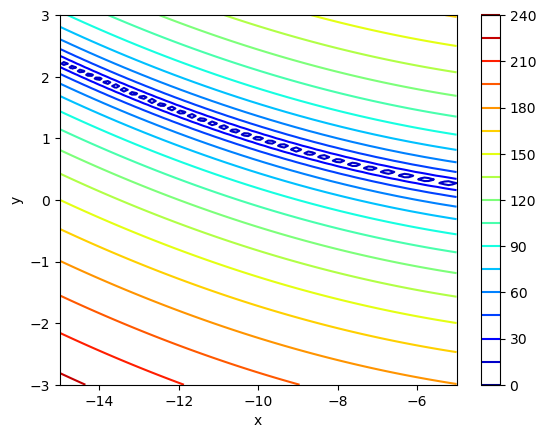

In [11]:
import numpy as np

def bukin(x, y):
    return 100*np.sqrt(np.abs(y - 0.01*x**2)) + 0.01*np.abs(x + 10)


import matplotlib.pyplot as plt

# Define the range of x and y values
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

# Create a 2D grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the value of the Bukin function at each point in the grid
Z = bukin(X, Y)

# Create a contour plot of the Bukin function
plt.contour(X, Y, Z, levels=20, cmap='jet')

# Add a colorbar to the plot
plt.colorbar()

# Add labels to the x and y axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [12]:
import numpy as np

# Define the Bukin function N6
def bukin(x, y):
    return 100*np.sqrt(np.abs(y - 0.01*x**2)) + 0.01*np.abs(x + 10)

# Define the state as a tuple (x, y)
# We will start the search from the initial state (-10, 1)
state = (-10, 1)

# Define a function to generate neighboring states
def get_neighbors(state, step_size=0.1):
    x, y = state
    neighbors = []
    for dx in [-step_size, 0, step_size]:
        for dy in [-step_size, 0, step_size]:
            if dx == dy == 0:
                continue
            neighbor = (x + dx, y + dy)
            if -15 <= neighbor[0] <= -5 and -3 <= neighbor[1] <= 3:
                neighbors.append(neighbor)
    return neighbors

# Define a function to evaluate the fitness of a state
def fitness(state):
    return bukin(*state)

# Define the stopping criteria
max_steps = 1000
max_no_improvement_steps = 50

# Run the Hill Climbing algorithm
best_state = state
best_fitness = fitness(state)
no_improvement_steps = 0
for i in range(max_steps):
    neighbors = get_neighbors(best_state)
    neighbor_fitnesses = [fitness(neighbor) for neighbor in neighbors]
    best_neighbor_fitness = min(neighbor_fitnesses)
    if best_neighbor_fitness < best_fitness:
        best_fitness = best_neighbor_fitness
        best_state = neighbors[neighbor_fitnesses.index(best_neighbor_fitness)]
        no_improvement_steps = 0
    else:
        no_improvement_steps += 1
        if no_improvement_steps >= max_no_improvement_steps:
            break

print(f"The minimum value of the Bukin function N6 is {best_fitness:.2f} at x={best_state[0]:.2f} and y={best_state[1]:.2f}")


The minimum value of the Bukin function N6 is 0.00 at x=-10.00 and y=1.00


In [13]:
import numpy as np

# Define the Knapsack problem
# We will use the values and weights from the example in the Wikipedia page
values = [1, 6, 18, 22, 28]
weights = [1, 2, 5, 6, 7]
capacity = 11

# Define the state as a binary string representing the items in the knapsack
state = np.zeros(len(values), dtype=int)

# Define a function to generate neighboring states
def get_neighbors(state):
    neighbors = []
    for i in range(len(state)):
        neighbor = state.copy()
        neighbor[i] = 1 - neighbor[i]
        neighbors.append(neighbor)
    return neighbors

# Define a function to evaluate the fitness of a state
def fitness(state):
    total_value = np.sum(state * values)
    total_weight = np.sum(state * weights)
    if total_weight > capacity:
        return 0
    else:
        return total_value

# Define the stopping criteria
max_steps = 1000
max_no_improvement_steps = 50

# Run the Hill Climbing algorithm
best_state = state
best_fitness = fitness(state)
no_improvement_steps = 0
for i in range(max_steps):
    neighbors = get_neighbors(best_state)
    neighbor_fitnesses = [fitness(neighbor) for neighbor in neighbors]
    best_neighbor_fitness = max(neighbor_fitnesses)
    if best_neighbor_fitness > best_fitness:
        best_fitness = best_neighbor_fitness
        best_state = neighbors[neighbor_fitnesses.index(best_neighbor_fitness)]
        no_improvement_steps = 0
    else:
        no_improvement_steps += 1
        if no_improvement_steps >= max_no_improvement_steps:
            break

print(f"The maximum value that can be packed into the knapsack is {best_fitness} with items {best_state}")


The maximum value that can be packed into the knapsack is 35 with items [1 1 0 0 1]


In [14]:
import numpy as np

def knapsack_hill_climbing(values, weights, capacity, num_iterations, num_restarts):
    best_solution = None
    best_fitness = -1
    
    n = len(values)
    for restart in range(num_restarts):
        # Start from a random initial state
        current_solution = np.random.randint(2, size=n)
        current_fitness = evaluate_solution(current_solution, values, weights, capacity)
        
        for i in range(num_iterations):
            # Generate a set of neighboring states by switching a zero to one
            neighbors = [np.copy(current_solution) for _ in range(n)]
            for j in range(n):
                if neighbors[j][j] == 0:
                    neighbors[j][j] = 1
            
            # Evaluate the fitness of each neighboring state
            neighbor_fitnesses = [evaluate_solution(neighbors[j], values, weights, capacity) for j in range(n)]
            
            # Select the best neighboring state and make it the new current state
            best_neighbor_index = np.argmax(neighbor_fitnesses)
            if neighbor_fitnesses[best_neighbor_index] > current_fitness:
                current_solution = neighbors[best_neighbor_index]
                current_fitness = neighbor_fitnesses[best_neighbor_index]
                
                # Update the best solution if necessary
                if current_fitness > best_fitness:
                    best_solution = current_solution
                    best_fitness = current_fitness
            
        # Print progress every 10 restarts
        if restart % 10 == 0:
            print(f"Restart {restart}: Best fitness = {best_fitness}")
    
    return best_solution, best_fitness

def evaluate_solution(solution, values, weights, capacity):
    total_value = np.sum(values * solution)
    total_weight = np.sum(weights * solution)
    if total_weight > capacity:
        return -1
    else:
        return total_value

# Example usage
values = np.array([10, 8, 15, 6, 3, 9])
weights = np.array([3, 2, 7, 4, 1, 5])
capacity = 12
num_iterations = 100
num_restarts = 50
best_solution, best_fitness = knapsack_hill_climbing(values, weights, capacity, num_iterations, num_restarts)
print(f"Best solution: {best_solution}, best fitness: {best_fitness}")



Restart 0: Best fitness = -1
Restart 10: Best fitness = 33
Restart 20: Best fitness = 33
Restart 30: Best fitness = 33
Restart 40: Best fitness = 33
Best solution: [1 1 1 0 0 0], best fitness: 33


In [15]:
#initial state
start_x = -10
start_y = -3

end_x = -5
end_y = 3

step = 1
tol = 0 # stop criterion

while(start_x <= end_x and start_y <= end_y):
    
    current_value = f(start_x, start_y)
    
    left_value = f(start_x - step, start_y)
    right_value = f(start_x + step, start_y)
    down_value = f(start_x, start_y - step)
    up_value = f(start_x, start_y + step)
    
    min_value = min(left_value, right_value, down_value, up_value)
   
    if min_value < current_value:
        if min_value == left_value:
            start_x -= step
        elif min_value == right_value:
            start_x += step
        elif min_value == down_value:
            start_y -= step
        else:
            start_y += step
    else:
        break
        
    if abs(min_value - current_value) <= tol:
        break
    
min_point = (start_x, start_y)
min_value = f(start_x, start_y)

print(min_point, min_value)

(-10, 1) 0.0


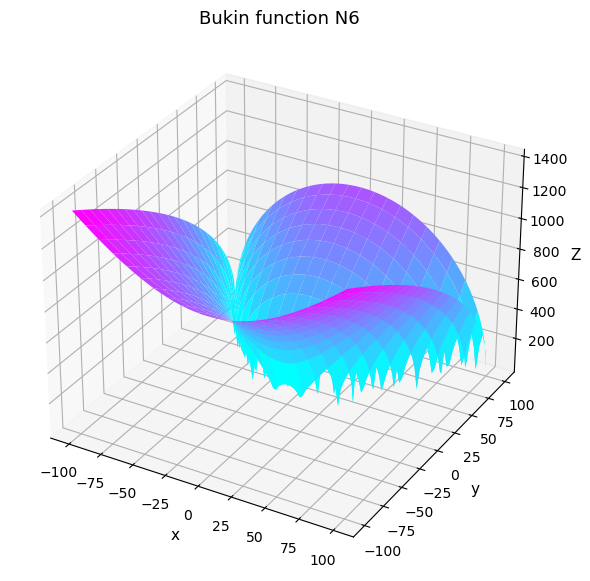

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01*(x * x))) + 0.01 * np.abs(x + 10)

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='cool')
ax.set_title("Bukin function N6", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 11)
plt.show()

In [18]:
#initial state
start_x = -12
start_y = -3

end_x = -5
end_y = 3

step = 1
tol = 0 # stop criterion

while(start_x <= end_x and start_y <= end_y):
    
    current_value = f(start_x, start_y)
    
    left_value = f(start_x - step, start_y)
    right_value = f(start_x + step, start_y)
    down_value = f(start_x, start_y - step)
    up_value = f(start_x, start_y + step)
    
    min_value = min(left_value, right_value, down_value, up_value)
   
    if min_value < current_value:
        if min_value == left_value:
            start_x -= step
        elif min_value == right_value:
            start_x += step
        elif min_value == down_value:
            start_y -= step
        else:
            start_y += step
    else:
        break
        
    if abs(min_value - current_value) <= tol:
        break
    
min_point = (start_x, start_y)
min_value = f(start_x, start_y)

print(min_point, min_value)

(-10, 1) 0.0


In [20]:
def knapsack_value(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    if total_weight > capacity:
        total_value -= (total_weight - capacity) * np.mean(values)
    
    return total_value

def hill_climbing_knapsack(values, weights, capacity, max_iterations=1000):
    n = len(values)
    current_solution = np.zeros(n) # empty string of n zeros
    
    current_value = knapsack_value(current_solution, values, weights, capacity)
    
    for _ in range(max_iterations): # neighbour creation
        neighbor_solution = current_solution.copy()
        index = np.random.randint(n)
        neighbor_solution[index] = 1 - neighbor_solution[index]
        
        neighbor_value = knapsack_value(neighbor_solution, values, weights, capacity)
        
        if neighbor_value > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value
        
        if np.all(current_solution == 1) or np.all(current_solution == 0): # stop criterion
            break
    
    return current_solution.astype(int)

values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30

solution = hill_climbing_knapsack(values, weights, capacity)

print(solution, ": ", knapsack_value(solution, values, weights, capacity))

# global optimum: [1 1 0 1 0]: 65
# gets stuck in local optima due to neighbour creation

[0 1 1 0 1] :  60


In [10]:
def hill_climbing_knapsack_improved(values, weights, capacity, num_restarts=10, max_iterations=1000):
    best_solution = None
    best_value = -np.inf
    
    for _ in range(num_restarts):
        solution = hill_climbing_knapsack(values, weights, capacity, max_iterations)
        value = knapsack_value(solution, values, weights, capacity)
        
        if value > best_value:
            best_solution = solution
            best_value = value
    
    return best_solution

solution = hill_climbing_knapsack_improved(values, weights, capacity)
print(solution, ": ", knapsack_value(solution, values, weights, capacity))


[1 1 0 1 0] :  65
